# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### **Parte A**

### 1. Preparación del Dataset

Empezamos por importar algunas de las librerías que vamos a necesitar para importar, preparar y explorar el dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


#### Primeras impresiones de estos datasets:

Podemos decir entonces que los años 2017, 2018, 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Procedemos a unir los 3 datasets para continuar con la exploración

In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


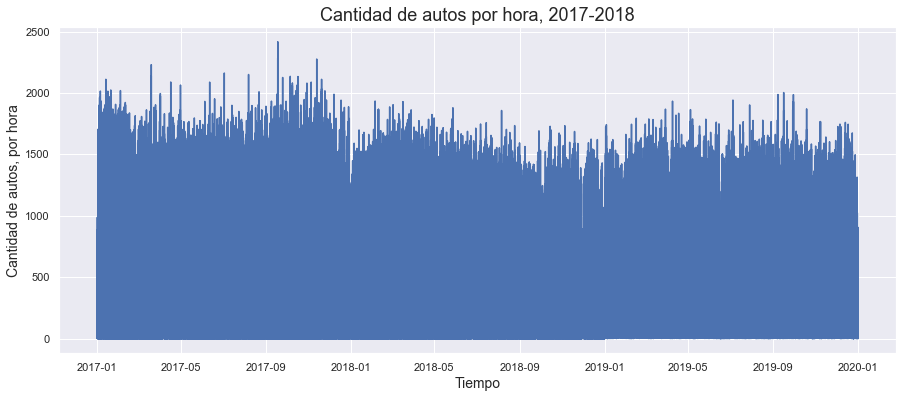

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.title('Cantidad de autos por hora, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Cantidad de autos, por hora', fontsize = 14)
plt.show()

Observamos que la data es muy densa para leerla por hora así que procedemos a resamplear la serie.

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable ya que tal como está el dataset por hora es díficil de interpretar
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


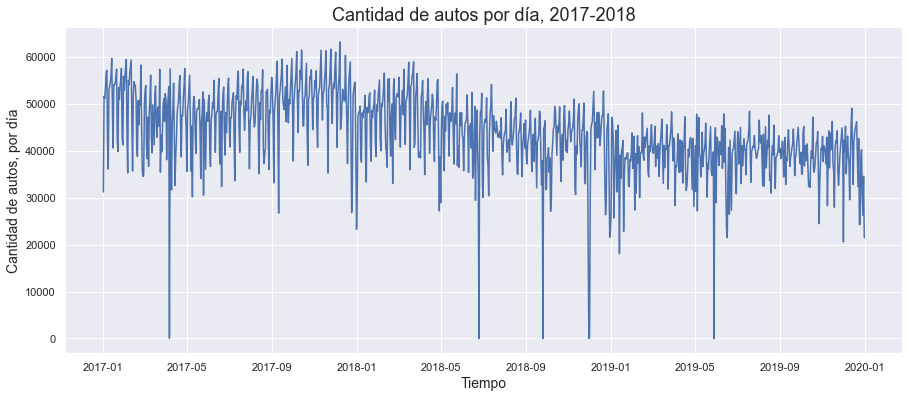

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de autos por día, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Cantidad de autos, por día', fontsize = 14)
plt.show()

Ahora que lo hemos resampleado por día, es más facil de interpretar y podemos ver unas fuertes caídas de los autos que pasan por la estación de peaje Illia que pagan en efectivo. 

### 2. Exploración de datos

Comenzamos con la exploración de datos de nuestro dataset en sus estado original y con algunos resampleaos.

In [17]:
dataset.describe()

,cantidad_pasos
count,238869.000000
mean,200.384232
std,403.246904
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,2416.000000


In [18]:
diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


### 2.1. Datos Faltantes

In [19]:
#valores faltantes
dataset.isna().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

En vista, de que no tenemos datos faltantes no hace falta hacer ninguna imputación

### 2.2. Valores Atípicos

Como mencionamos antes,en comparación con el resto del dataset existen unos días con fuertes caídas de los pases de autos lo que nos indica que son valores atípicos así que vamos a explorarlos

In [20]:
#observamos aquellos valores menores a 15mil pasos 
diario_out=diario[diario.cantidad_pasos <=15000]
diario_out

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


In [21]:
diario.cantidad_pasos[diario.cantidad_pasos <=15000] = np.nan

In [22]:
#interpolamos estos valores
print(diario.isna().sum())
diario = diario.interpolate(method='nearest', k=1)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


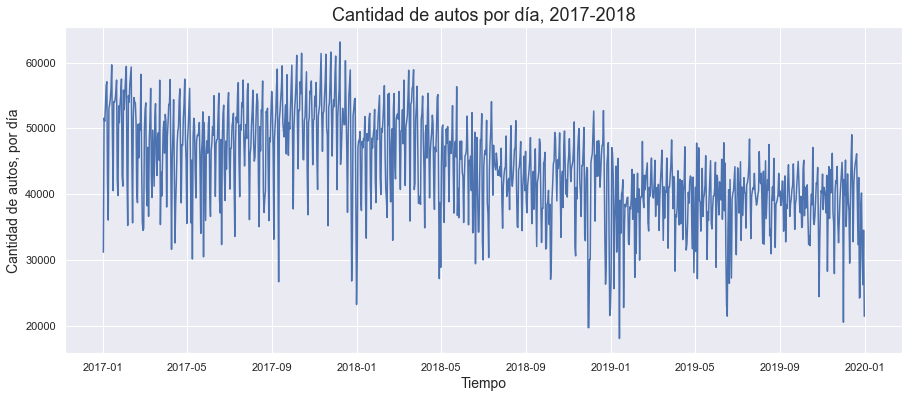

In [23]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de autos por día, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize= 14)
plt.ylabel('Cantidad de autos, por día', fontsize= 14)
plt.show()

Podemos ver la mejora del dataset una vez que hemos filtrado los outliers. Además, como pudimos observar los outliers corresponden a fechas muy puntuales, ya de antemano sin explorar mucho reconocemos que un par de fechas corresponden a que el G20 tomó lugar en Buenos Aires, lo cual trajo varios controles e implicaciones a nivel de seguridad en el tránsito pero exploremos las fechas con más cuidado

#### 2.2.1. Exploración de valores atípicos

In [24]:
out_2017 =data_2017[(data_2017.estacion=='Illia')& (data_2017.fecha=='2017-04-06')]
out_2017=out_2017.loc[:, ['forma_pago' ,'cantidad_pasos']]
out_2017.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,45961
TELEPASE,19296
EFECTIVO,40
EXENTO,1


De acuerdo a lo que pudimos encontrar en las noticias, este día hubo un paro nacional, lo cual puede explicar porque hubo tantos pagos no cobrados.

In [25]:
out_2018 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-06-25')]
out_2018=out_2018.loc[:, ['forma_pago' ,'cantidad_pasos']]
out_2018.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,85099


Este día también hubo un paro nacional de 24 horas en protesta al gobierno de paso

In [26]:
out_2018 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-09-25')]
out_2018=out_2018.loc[:, ['forma_pago' ,'cantidad_pasos']]
out_2018.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,78690


Este día también hubo un paro general

In [27]:
out_2018 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-11-30')]
out_2018=out_2018.loc[:, ['forma_pago' ,'cantidad_pasos']]
out_2018.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,387


In [28]:
out_2018 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-12-01')]
out_2018=out_2018.loc[:, ['forma_pago' ,'cantidad_pasos']]
out_2018.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,464
EFECTIVO,350
TELEPASE,290
EXENTO,9
INFRACCION,5
TARJETA DISCAPACIDAD,3


Como mencionamos anteriormente, el G20 tuvo lugar en Buenos Aires entre los días 30 de noviembre y 1 de diciembre de 2018, por lo que el comportamiento del tráfico de estos días es ocasionado a los operativos de seguridad y cortes.

In [29]:
out_2019 =data_2019[(data_2019.estacion=='Illia')& (data_2019.fecha=='2019-05-29')]
out_2019=out_2019.loc[:, ['forma_pago' ,'cantidad_pasos']]
out_2019.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,87419


Nuevamente, nos encontramos con que este día tuvo lugar un paro general donde los peajes eran gratuitos.

En relación a los paros, es importante mencionar que el Gobierno Nacional toma ciertas medidas para facilitar la circulación, especialmente para facilitar a los ciudadanos la ida a sus trabajos. Entre estas medidas, los peajes son gratuitos, por eso vemos como la forma de pago no cobrado aumenta particularmente en estas fechas. 

### 2.3. Exploración del pase de autos

In [30]:
pases = dataset[dataset.cantidad_pasos>=(dataset.cantidad_pasos.mean()+ dataset.cantidad_pasos.std())]
pases

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
11,Domingo,Centro,Liviano,857,2017-01-01 00:00:00
16,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
19,Domingo,Provincia,Liviano,704,2017-01-01 03:00:00
22,Domingo,Centro,Liviano,988,2017-01-01 03:00:00
...,...,...,...,...,...
238850,Martes,Provincia,Liviano,643,2019-12-31 18:00:00
238854,Martes,Provincia,Liviano,640,2019-12-31 19:00:00
238858,Martes,Provincia,Liviano,773,2019-12-31 20:00:00
238861,Martes,Provincia,Liviano,905,2019-12-31 21:00:00


In [31]:
#Exploramos cuál es el día con más tránsito de la semana
pases.groupby('dia').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
dia,
Viernes,6260472
Jueves,5892907
Miércoles,5674526
Martes,5442516
Lunes,5225756
Sábado,5182949
Domingo,4299132


Observamos que el día con más pases de autos que pagaron en efectivo en la estación Illia es el día **Viernes**

In [32]:
#miramos en qué fecha y hora pasaron más autos
pases.groupby('fecha').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
fecha,
2017-10-05 18:00:00,3842
2017-10-13 15:00:00,3794
2017-11-17 14:00:00,3738
2017-12-07 16:00:00,3726
2017-10-13 16:00:00,3629
...,...
2019-10-24 23:00:00,604
2018-03-10 00:00:00,604
2018-02-12 09:00:00,604


El momento en que pasaron más autos fue el 05 de octubre de 2017 a las 18hs

In [33]:
#exploramos el sentido más común
pases.groupby('sentido').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
sentido,
Centro,19650277
Provincia,18327981


El sentido más común fue hacia el Centro de la ciudad con 1.965.277 pases

In [34]:
#exploramos el pase de autos diario
pases_diario = diario[diario.cantidad_pasos>=(diario.cantidad_pasos.mean()+ diario.cantidad_pasos.std())]
pases_diario.groupby('fecha').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
fecha,
2017-12-07,63127.0
2017-11-24,61594.0
2017-10-13,61421.0
2017-11-10,61382.0
2017-11-17,61259.0
...,...
2017-09-19,51556.0
2018-01-18,51548.0
2017-02-13,51546.0


El día con más pases de autos fue el 07 de diciembre de 2017 con 63k pases

In [35]:
#exploramos el pase de autos mensual, para ello hacemos un resampleo
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


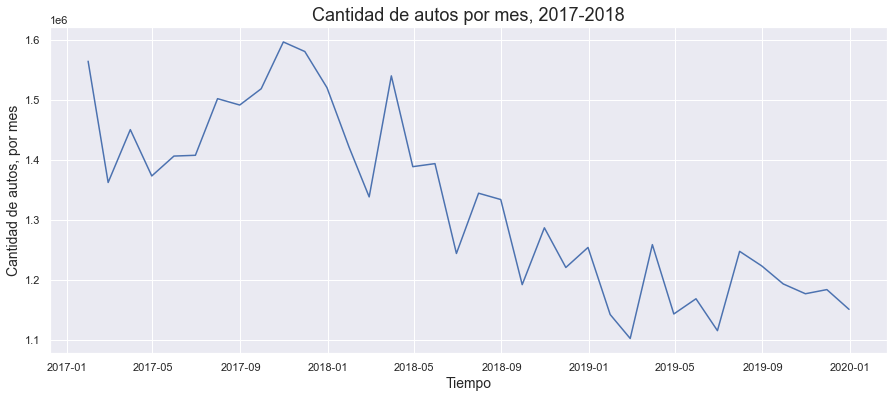

In [36]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.title('Cantidad de autos por mes, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por mes',fontsize=14)
plt.show()

In [37]:
pases_mensuales = mensual[mensual.cantidad_pasos>=(mensual.cantidad_pasos.mean()+ mensual.cantidad_pasos.std())]
pases_mensuales.groupby('fecha').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
fecha,
2017-10-31,1597356
2017-11-30,1581428
2017-01-31,1565260
2018-03-31,1540839
2017-12-31,1521177
2017-09-30,1519327
2017-07-31,1502820
2017-08-31,1492232


El mes con más pases fue en Octubre del 2017 con 1,6M. Además, del gráfico mensual vemos lo que parece ser una tendencia negativa.

### 2.3.1 Exploración de los pases de auto por año

Vamos a explorar las formas de pago en la estación Illia y en todas las estaciones

**2017**

In [38]:
illia_2017 = data_2017[data_2017.estacion=='Illia']
illia_2017['forma_pago'].value_counts()

EFECTIVO                104230
TELEPASE                 79903
EXENTO                   39201
INFRACCION               24526
TARJETA DISCAPACIDAD     22145
NO COBRADO               21881
MONEDERO                    14
Name: forma_pago, dtype: int64

In [39]:
data_2017['forma_pago'].value_counts()

EFECTIVO                447203
TELEPASE                397420
EXENTO                  169889
INFRACCION              140275
NO COBRADO              117730
TARJETA DISCAPACIDAD    100106
MONEDERO                    14
Otros                        8
Name: forma_pago, dtype: int64

**2018**

In [40]:
illia_2018 = data_2018[data_2018.estacion=='Illia']
illia_2018['forma_pago'].value_counts()

EFECTIVO                99996
TELEPASE                89921
EXENTO                  37498
INFRACCION              29459
NO COBRADO              23454
TARJETA DISCAPACIDAD    19191
Name: forma_pago, dtype: int64

In [41]:
data_2018['forma_pago'].value_counts()

TELEPASE                429053
EFECTIVO                423633
EXENTO                  162103
INFRACCION              153331
NO COBRADO              121440
TARJETA DISCAPACIDAD     86348
Name: forma_pago, dtype: int64

**2019**

In [42]:
illia_2019 = data_2019[data_2019.estacion=='Illia']
illia_2019['forma_pago'].value_counts()

TELEPASE           34788
EFECTIVO           34643
EXENTO             29204
INFRACCION         24015
NO COBRADO         21344
T. DISCAPACIDAD    17139
Name: forma_pago, dtype: int64

In [43]:
data_2019['forma_pago'].value_counts()

TELEPASE           201388
EFECTIVO           149340
NO COBRADO         141280
EXENTO             132716
INFRACCION         111428
T. DISCAPACIDAD     76001
Name: forma_pago, dtype: int64

Podemos observar que en la estación Illia el efectivo fue la forma de pago más utilizada hasta el 2019 cuando fue desplazada por el telepase mientras que para todas las estaciones el efectivo ya se habia desplazado como primera forma de pago desde el 2018. Esto explica la tendencia negativa que observamos anteriormente.

### 2.4 Resampleos

Ahora que hemos explorado el dataset, vamos a evarluarlo semanalmente ya que si bien diario podemos entenderlo más facilmente que en su forma original, analizarlo en semanas puede simplificar nuestro análisis ya que manejaremos menos cantidad de datos

In [44]:
#Resampleamos el dataset diario que ya habiamos filtrado por sus valores atípicos para no repetir el proceso
semanal = diario.resample('W').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0


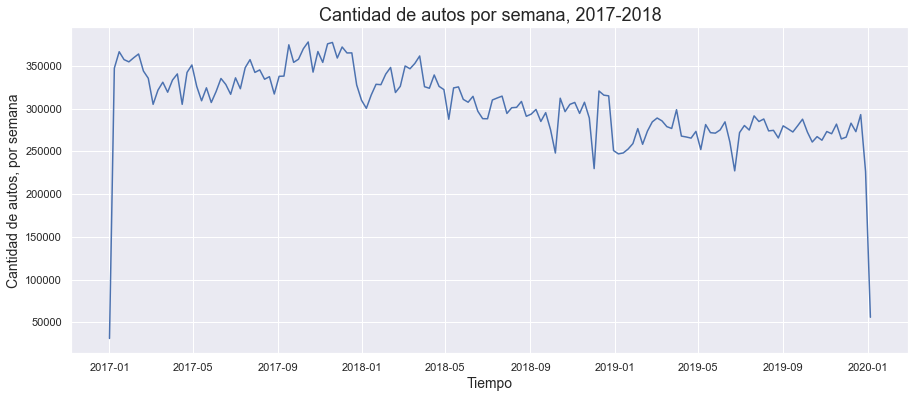

In [45]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.title('Cantidad de autos por semana, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por semana',fontsize=14)
plt.show()

In [46]:
#Resampleamos nuestros datos para agrupar por la media semanal
semanal_media = diario.resample('W').mean()
print(semanal_media.shape)
semanal_media.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571


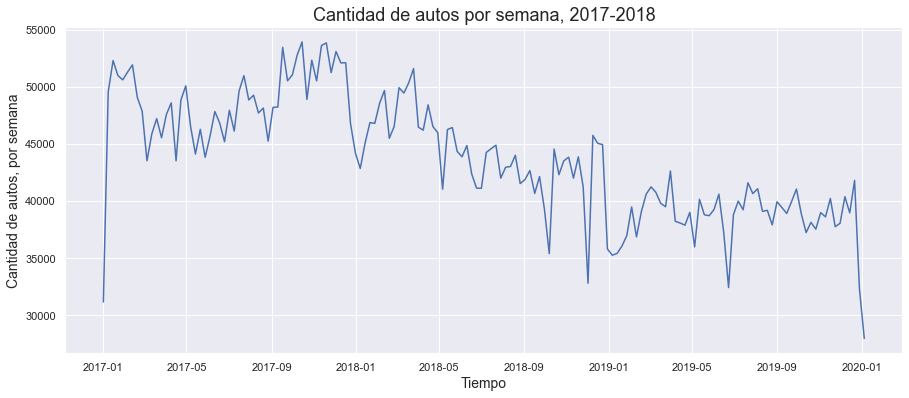

In [47]:
plt.figure(figsize = (15,6))
plt.plot(semanal_media.index, semanal_media.cantidad_pasos)
plt.title('Cantidad de autos por semana, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por semana',fontsize=14)
plt.show()

De las gráficas anteriores, podemos ver que la data inicia recuperándose de una caída y termina con una fuerte caída, esto se debe a que la primera y úlima semana están incompletas en cuanto a los datos. Por tanto, vamos a filtrar estas semanas.

In [48]:
semanal.cantidad_pasos[semanal.cantidad_pasos <=200000] = np.nan
print(semanal.isna().sum())

cantidad_pasos    2
dtype: int64


In [49]:
semanal = semanal.interpolate(limit_direction='both')
print(semanal.isna().sum())

cantidad_pasos    0
dtype: int64


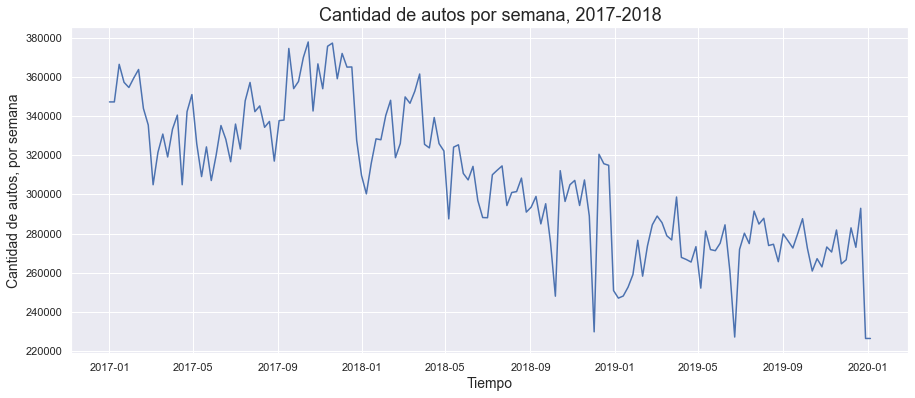

In [50]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.title('Cantidad de autos por semana, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por semana',fontsize=14)
plt.show()

In [51]:
semanal_media.cantidad_pasos[semanal_media.cantidad_pasos <=31500] = np.nan
print(semanal_media.isna().sum())

cantidad_pasos    2
dtype: int64


In [52]:
semanal_media = semanal_media.interpolate(limit_direction='both')
print(semanal_media.isna().sum())

cantidad_pasos    0
dtype: int64


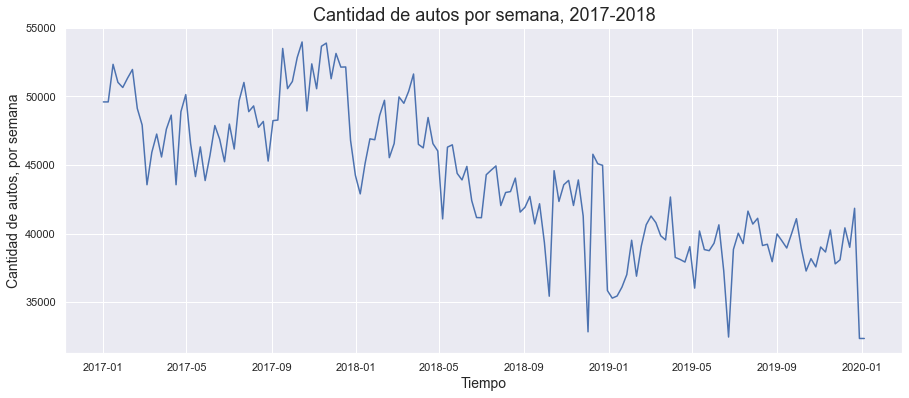

In [53]:
plt.figure(figsize = (15,6))
plt.plot(semanal_media.index, semanal_media.cantidad_pasos)
plt.title('Cantidad de autos por semana, 2017-2018', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por semana',fontsize=14)
plt.show()

Después de haber filtrado la primera y última semana del dataset podemos ver que las gráficas son bastantes similares, pero a partir de ahora nos vamos a manejar con la media semanal pues va a ser mas facil manejarnos con esta.

### 3. Descomposición y autocorrelación de la serie

Vamos a descomponer la serie para analizar en mayor profundidad su tendencia, estacionalidad y errores. También vamos a analizar la autocorrelación que nos ayudará a seguir con nuestro modelos de predicción.

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
import statsmodels.tsa as tsa

# Vamos a usar la descompasición aditiva
result_add = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='additive', extrapolate_trend='freq')

In [56]:
result = seasonal_decompose(semanal_media.cantidad_pasos, model='additive')

In [57]:
result.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: trend, Length: 158, dtype: float64

In [58]:
result.seasonal

fecha
2017-01-01   -4358.698916
2017-01-08   -5236.400839
2017-01-15   -3969.573229
2017-01-22   -2651.565674
2017-01-29   -2143.418009
                 ...     
2019-12-08    4270.013996
2019-12-15    4010.701496
2019-12-22    1384.474848
2019-12-29   -4358.698916
2020-01-05   -5236.400839
Freq: W-SUN, Name: seasonal, Length: 158, dtype: float64

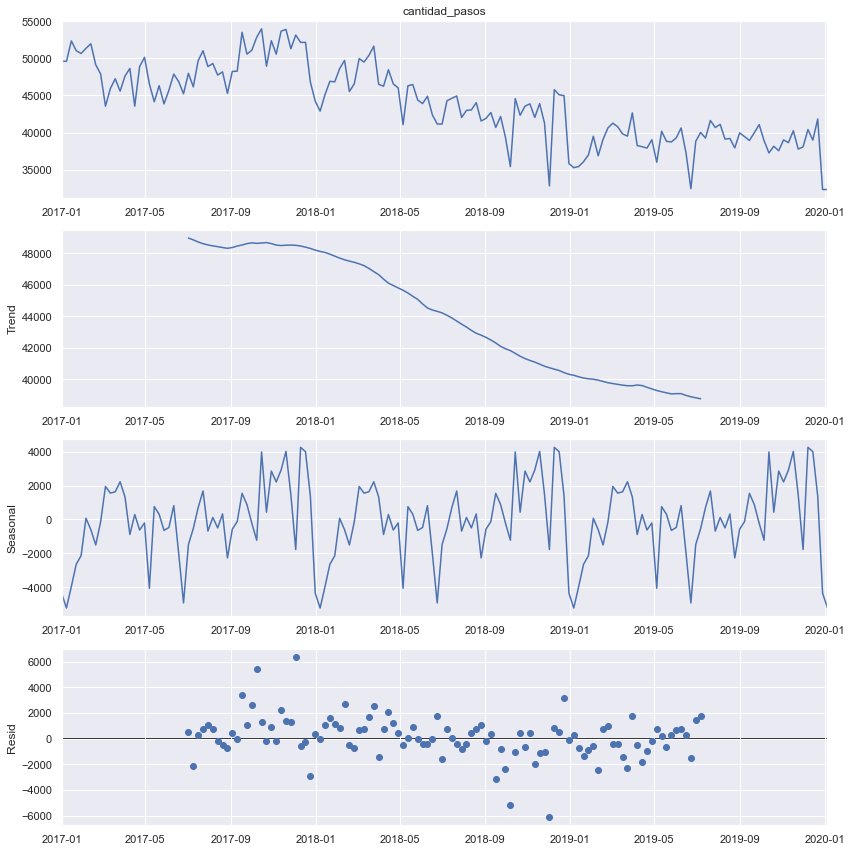

In [59]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Del gráfico anterior, podemos ver que lo siguiente:
* Hay una marcada tendencia negativa, que anticipabamos dado nuestro análisis año a año
* Podemos ver que a pesar de la tendencia negativa, los ciclos año a año son muy similares
* Los residuos se encuentran alrededor de una media 0, parecen no seguir un patrón en partícular lo que nos sugiere que estamos en presencia de Ruido Blanco

De acuerdo a lo descrito anteriormente, podemos ver que los componente de la serie (Tendencia, Estacionalidad y Residuos) son independientes, por ejemplo: la tendencia no afecta la estacionalidad de la serie, con lo cual el método aditivo es el correcto a utilizar.


C:\Users\juanmanuel\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


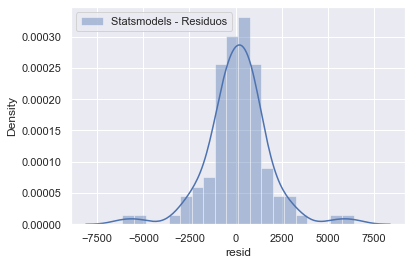

In [60]:
plt.figure(figsize = (6,4))
sns.distplot(result.resid, bins = 20, label="Statsmodels - Residuos")

plt.legend()
plt.show()

Podemos observar que los residuos tienen una distribución normal

In [61]:
from statsmodels.tsa.stattools import acf

In [62]:
nlags =  156
autocorr = acf(semanal_media.cantidad_pasos, nlags = nlags)
autocorr.shape

C:\Users\juanmanuel\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(157,)

Text(0.5, 0, 'lag')

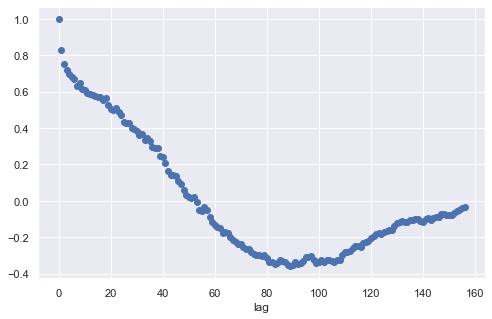

In [63]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

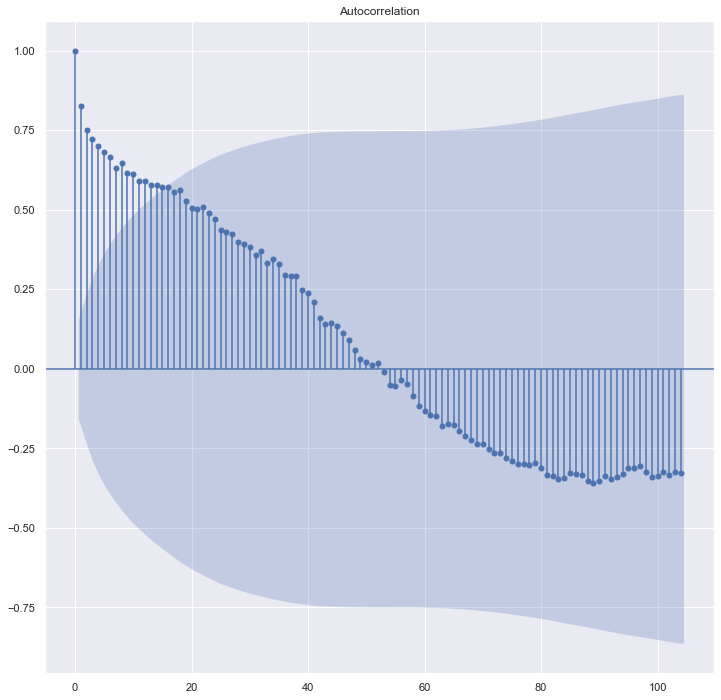

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal_media.cantidad_pasos, lags = 52*2)
plt.show()

Cuando una serie está significativamente autocorrelacionada, significa que los valores anteriores de la serie (rezagos) pueden ser útiles para predecir el valor actual. En este casp, podemos observar que tenemos 16 lags significativos que nos servirán como nuestro lookback para hacer nuestros modelos de predicción.

### **Parte B**

### 4. Modelos de Machine Learning

Vamos a utilizar como métrica de error el error cuadrático medio (MSE) ya que mide el promedio de errores al cuadrado de un estimador, es decir, el promedio de la diferencia al cuadrado entre los valores estimados y lo que está siendo estimado. Mientras más pequeño sea el MSE es más precisa nuestra predicción

### 4.1. Benchmark

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
#Separo mi X y y para predecir

# 3ª trimestre 2019
fecha_i='2019-07-01'
fecha_f='2019-09-30'
X= semanal_media[(semanal_media.index >=fecha_i)&(semanal_media.index <=fecha_f)]

# 4º trimestre 2019 = Ultimo trimestre  2019
fecha_i='2019-10-01'
fecha_f='2019-12-31'
y=semanal_media[(semanal_media.index >=fecha_i)&(semanal_media.index <=fecha_f)]

y_t=X.cantidad_pasos.rolling(window=1, center=True).mean()
b_rmse=np.sqrt(mean_squared_error(y, y_t))
print(f'RMSE en Benchmark: {b_rmse}')

RMSE en Benchmark: 2999.8287232635216


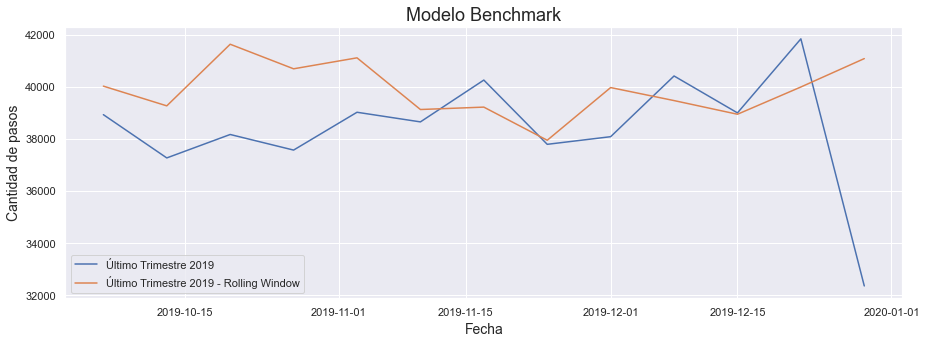

In [67]:
plt.figure(figsize = (15,5))
plt.plot(y.index, y.cantidad_pasos, label = 'Último Trimestre 2019')
plt.plot(y.index,y_t, label = 'Último Trimestre 2019 - Rolling Window')
plt.title('Modelo Benchmark', fontsize=18)
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Cantidad de pasos',fontsize=14)
plt.legend()
plt.show()

In [68]:
senial = semanal_media.cantidad_pasos
senial

fecha
2017-01-01    49601.714286
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
                  ...     
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    32341.428571
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

In [69]:
senial.shape

(158,)

In [70]:
look_back = 16

In [71]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(141, 16) (141,)


In [72]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [73]:
print(X)

[[49601.71428571 49601.71428571 52344.71428571 ... 47613.85714286
  48639.57142857 43558.85714286]
 [49601.71428571 52344.71428571 51030.71428571 ... 48639.57142857
  43558.85714286 48889.28571429]
 [52344.71428571 51030.71428571 50654.42857143 ... 43558.85714286
  48889.28571429 50135.14285714]
 ...
 [37942.         39967.85714286 39467.28571429 ... 37785.71428571
  38079.28571429 40413.        ]
 [39967.85714286 39467.28571429 38941.71428571 ... 38079.28571429
  40413.         38994.28571429]
 [39467.28571429 38941.71428571 39989.57142857 ... 40413.
  38994.28571429 41840.14285714]]


In [74]:
print(y)

[48889.28571429 50135.14285714 46553.57142857 44153.14285714
 46320.         43864.85714286 45705.28571429 47878.14285714
 46874.57142857 45235.85714286 47985.71428571 46165.57142857
 49681.42857143 51022.28571429 48891.42857143 49309.14285714
 47749.28571429 48177.57142857 45283.85714286 48237.
 48276.14285714 53502.85714286 50571.28571429 51095.85714286
 52845.42857143 53976.         48938.71428571 52378.57142857
 50563.85714286 53663.42857143 53894.71428571 51293.28571429
 53138.57142857 52141.57142857 52151.85714286 46800.28571429
 44241.71428571 42891.71428571 45111.42857143 46908.42857143
 46841.         48610.71428571 49720.57142857 45533.28571429
 46566.57142857 49966.85714286 49500.85714286 50387.57142857
 51637.85714286 46506.42857143 46246.42857143 48465.
 46557.71428571 46022.         41067.14285714 46302.14285714
 46472.         44387.         43909.85714286 44898.71428571
 42404.85714286 41164.85714286 41151.71428571 44287.42857143
 44619.28571429 44931.         42038.571

In [75]:
N_train = 156 - 12 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(128, 16) (128,)
(12, 16) (12,)


### 4.2. Random Forest

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train,y_train)

In [77]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

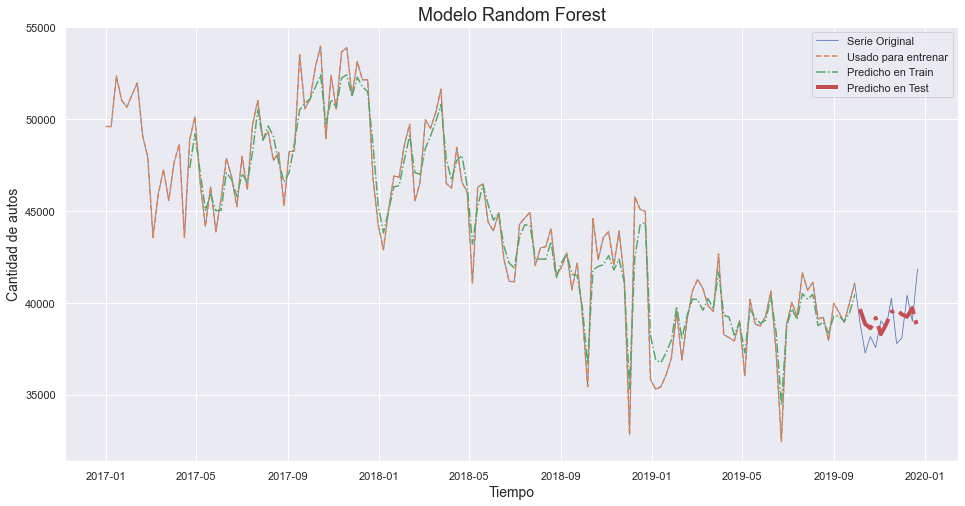

In [78]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('Modelo Random Forest', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos', fontsize=14)
plt.show()

In [79]:
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Error en Train:',rmse_train_rf)

rmse_test_osrf = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Error en Test:',rmse_test_osrf)

Error en Train: 1019.6686024311741
Error en Test: 1427.3852558398337


### 4.2.1. Optimización de hiperparámetros

In [80]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, cross_validate, StratifiedKFold

In [81]:
%%time

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

hp = [{'n_estimators': np.arange(1, 200, 2),
                  'max_depth':np.arange(10, 50, 1)}]

grid = GridSearchCV(estimator=reg_rf, param_grid=hp, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.06188391666490685
RandomForestRegressor(max_depth=17, n_estimators=39)
{'max_depth': 17, 'n_estimators': 39}
Wall time: 45min 53s


In [80]:
rf_hp = RandomForestRegressor(n_estimators=39,max_depth=17, random_state=42).fit(X_train,y_train)

In [81]:
y_pred = rf_hp.predict(X)
y_train_pred = rf_hp.predict(X_train)
y_test_pred = rf_hp.predict(X_test)

In [82]:
rmse_train_rfhp = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Error en Train:',rmse_train_rfhp)

rmse_test_osrfhp = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Error en Test:',rmse_test_osrfhp)

Error en Train: 1077.2532909977185
Error en Test: 1340.702409540009


Al mejorar los hiperparámetros, vemos que el error en el test mejoró un 6%. Ahora, analicemos que semanas el modelo consideró más importantes para predecir.

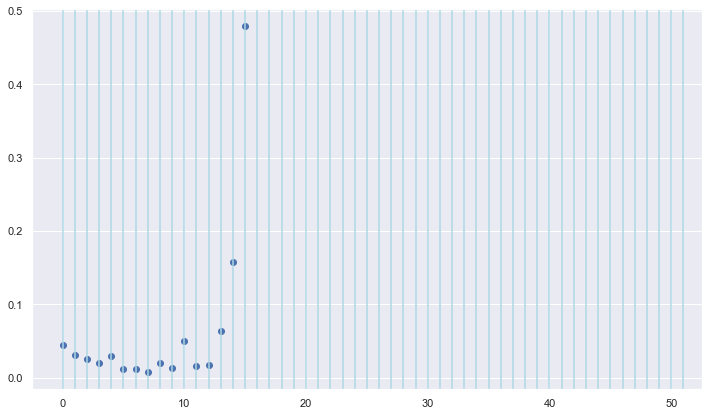

In [83]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf_hp.feature_importances_.size),rf_hp.feature_importances_)
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'lightblue')
plt.show()

Observamos que la semana a la cual este modelo le da más importancia es a la semana 15, seguido de la semana 14 y 13.

### 4.3. XGBoost

In [84]:
import xgboost as xgb
from xgboost import XGBRegressor

In [85]:
xgb=XGBRegressor(objective = 'reg:squarederror',random_state=42).fit(X_train,y_train)

In [86]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

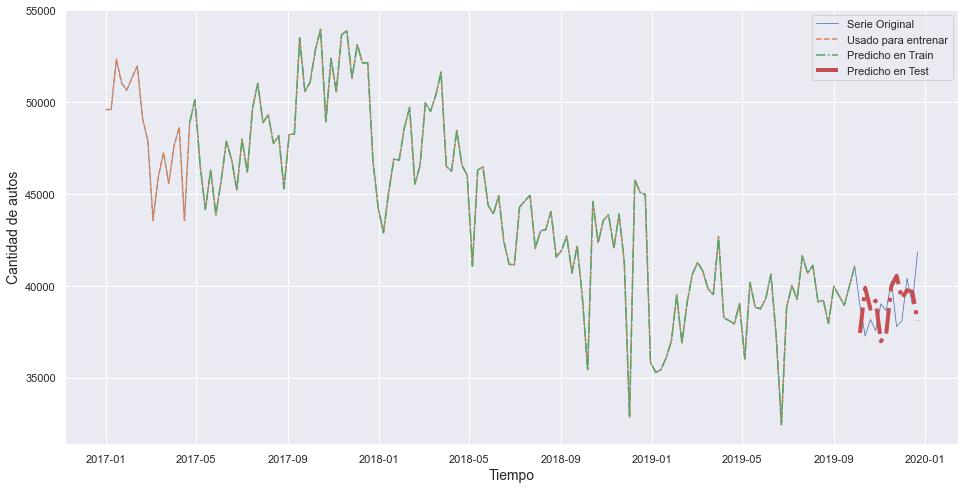

In [87]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos', fontsize=14)
plt.show()

In [88]:
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Error en Train:',rmse_train_xgb)

rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Error en Test:',rmse_test_xgb)

Error en Train: 0.06695572934656971
Error en Test: 1871.0624707567804


### 4.3.1. Optimización de hiperparámetros

In [91]:
%%time

reg_xgb = XGBRegressor()
reg_xgb.fit(X_train,y_train)

hp = [{'nthread': [4],
              'objective': ['reg:squarederror'],
              'learning_rate': [0.1,0.2,0.3],
              'max_depth':[4,5,6,7],
              'min_child_weight': [1,2,3,4],
              'subsample':[0.5,0.7,0.8,0.9,1],
              'colsample_bytree':[0.5,0.7,1],
              'reg_lambda':[1,2,3],
              'n_estimators':[20,50,100,200]}]

grid = GridSearchCV(estimator=reg_xgb, param_grid=hp, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

-0.1659281018788025
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=3, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 20, 'nthread': 4, 'objective': 'reg:squarederror', 'reg_lambda': 3, 'subsample': 1}
Wall time: 26min 43s


In [89]:
xgb_hp=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.3, max_depth=5, min_child_weight= 3, n_estimators=20, nthread= 4, objective= 'reg:squarederror', reg_lambda= 3, subsample= 1).fit(X_train,y_train)

In [90]:
y_train_pred = xgb_hp.predict(X_train)
y_test_pred = xgb_hp.predict(X_test)

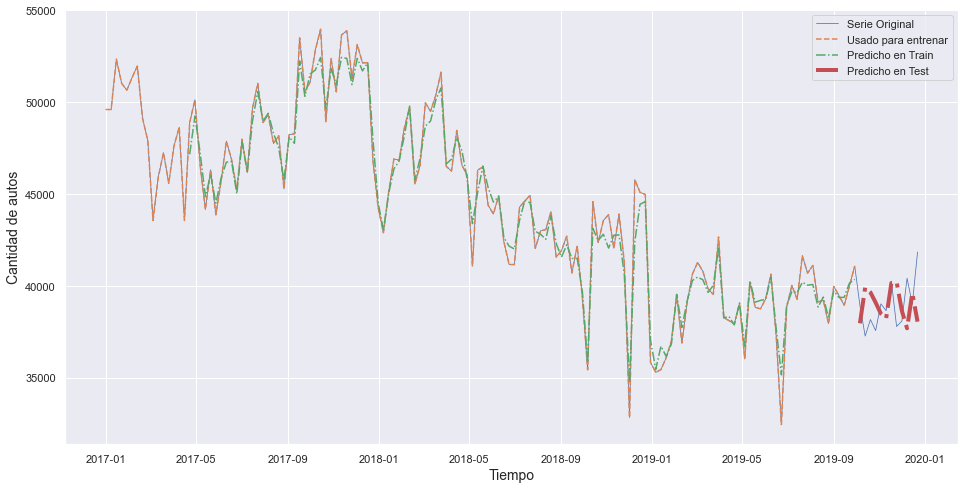

In [91]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos', fontsize=14)
plt.show()

In [92]:
rmse_train_xgb_hp = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Error en Train:',rmse_train_xgb)

rmse_test_xgb_hp = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Error en Test:',rmse_test_xgb_hp)

Error en Train: 0.06695572934656971
Error en Test: 1855.5947048637831


Al mejorar los hiperparámetros, vemos que el error en el test mejoró tan solo un 1%. Ahora, analicemos que semanas el modelo consideró más importantes para predecir.

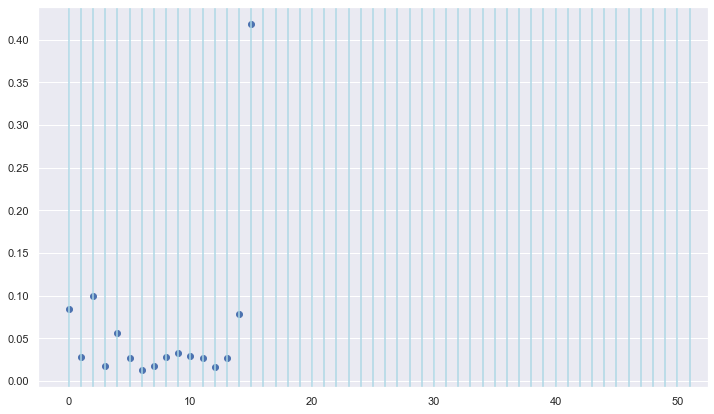

In [93]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(xgb_hp.feature_importances_.size),xgb_hp.feature_importances_)
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'lightblue')
plt.show()

Este modelo le da más importancia a la semana 15 a la hora de predecir. Las semanas 2 y 14 le siguen en importancia.

### 4.4. SARIMA

In [76]:
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
y=semanal_media
y.head()

,cantidad_pasos
fecha,
2017-01-01,49601.714286
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571


In [78]:
y['2019':]

,cantidad_pasos
fecha,
2019-01-06,35284.857143
2019-01-13,35439.571429
2019-01-20,36088.142857
2019-01-27,37002.714286
2019-02-03,39509.714286
2019-02-10,36886.285714
2019-02-17,39094.857143
2019-02-24,40634.142857
2019-03-03,41274.142857


In [83]:
d=range(1,2) #diferenciamos la serie 1 vez dado que como vimos tiene tendencia, es decir, es no estacionaria
p=q=range(8,17) #establecemos un rango razonable que considere nuestro lookback
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(8, 1, 9) x(8, 1, 9, 12)
SARIMAX:(8, 1, 9) x(8, 1, 10, 12)
SARIMAX:(8, 1, 10) x(8, 1, 11, 12)
SARIMAX:(8, 1, 10) x(8, 1, 12, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX (y,
                                           order= param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
        except:
            continue

SARIMAX(8, 1, 8)x(8, 1, 8, 12) - AIC:799.5513492474666
SARIMAX(8, 1, 8)x(8, 1, 9, 12) - AIC:580.1936739590633
SARIMAX(8, 1, 8)x(8, 1, 10, 12) - AIC:361.76390465686984
SARIMAX(8, 1, 8)x(8, 1, 11, 12) - AIC:144.92875320714646
SARIMAX(8, 1, 8)x(8, 1, 12, 12) - AIC:74.0
SARIMAX(8, 1, 8)x(8, 1, 13, 12) - AIC:76.0
SARIMAX(8, 1, 8)x(8, 1, 14, 12) - AIC:78.0
SARIMAX(8, 1, 8)x(8, 1, 15, 12) - AIC:80.0
SARIMAX(8, 1, 8)x(8, 1, 16, 12) - AIC:82.0
SARIMAX(8, 1, 8)x(9, 1, 8, 12) - AIC:597.7319010364322
SARIMAX(8, 1, 8)x(9, 1, 9, 12) - AIC:581.3249575590636
SARIMAX(8, 1, 8)x(9, 1, 10, 12) - AIC:363.7651656072005
SARIMAX(8, 1, 8)x(9, 1, 11, 12) - AIC:146.92871000759186
SARIMAX(8, 1, 8)x(9, 1, 12, 12) - AIC:76.0
SARIMAX(8, 1, 8)x(9, 1, 13, 12) - AIC:78.0
SARIMAX(8, 1, 8)x(9, 1, 14, 12) - AIC:80.0
SARIMAX(8, 1, 8)x(9, 1, 15, 12) - AIC:82.0
SARIMAX(8, 1, 8)x(9, 1, 16, 12) - AIC:84.0
SARIMAX(8, 1, 8)x(10, 1, 8, 12) - AIC:380.03620140918133
SARIMAX(8, 1, 8)x(10, 1, 9, 12) - AIC:382.0428869035011
SARIMAX(8,

Dejamos correr la celda anterior aprox 5 horas, en vista de que puede tardar mucho tiempo más no la volvemos a correr y probamos algunos parámetros en la siguiente celda para continuar con nuestro modelo.

In [84]:
 mod = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 10),
                                seasonal_order=(10, 1, 10, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1863      6.924     -0.027      0.979     -13.756      13.384
ar.L2         -0.1178     10.529     -0.011      0.991     -20.755      20.519
ar.L3         -0.1633      9.983     -0.016      0.987     -19.730      19.404
ar.L4         -0.2141     12.355     -0.017      0.986     -24.430      24.001
ar.L5          0.1727      8.732      0.020      0.984     -16.941      17.286
ar.L6         -0.3854      9.095     -0.042      0.966     -18.211      17.441
ar.L7         -0.4049      6.722     -0.060      0.952     -13.580      12.770
ar.L8          0.4934     10.028      0.049      0.961     -19.160      20.147
ar.L9          0.3825      4.377      0.087      0.930      -8.195       8.960
ar.L10         0.1475      7.558      0.020      0.984     -14.667      14.962
ma.L1          0.2732      8.446      0.032      0.9

Con estos parámetros y los resultados obtenidos, pasamos a hacer nuestro modelo de predicción para el último trimestre de 2019 (Octubre-Diciembre 2019)

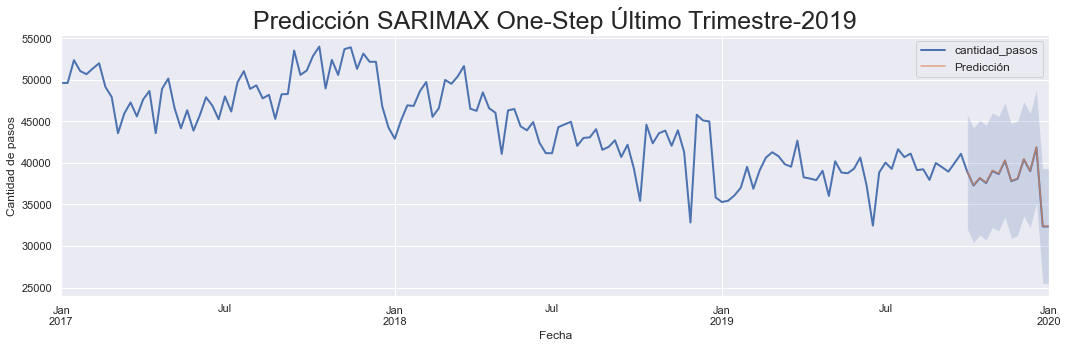

In [85]:
pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='Serie Observada',lw = 2,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.2)
plt.title("Predicción SARIMAX One-Step Último Trimestre-2019", fontsize=25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [86]:
y_predicha = pred.predicted_mean
y_observada = y['2019-10-06':]


rmse_sarima = np.sqrt(mean_squared_error(y_observada,y_predicha))
print(f'RMSE de SARIMAX One-Step es: {rmse_sarima}')

RMSE de SARIMAX One-Step es: 61.259097628500925


### Comparación de modelos

In [101]:
list_scores = [b_rmse,rmse_test_osrfhp, rmse_test_xgb_hp,rmse_sarima]
list_regressors = ['Benchmark','RF','XGB','Sarima']

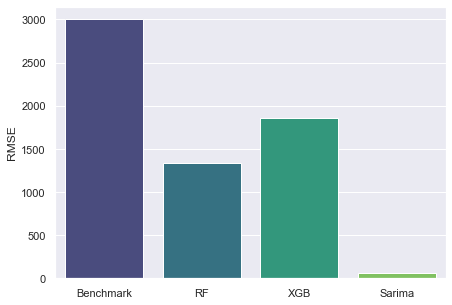

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.barplot(x=list_regressors, y=list_scores, ax=ax, palette = 'viridis')
plt.ylabel('RMSE')
plt.show()

Podemos ver que el modelo que mejor se desempeña es el modelo SARIMA One-Step pues nos da el menor error de predicción, seguido del Random Forest y el XGB. Podemos observar que los 3 modelos se comportaron mejor que el modelo benchmark, sin embargo, escogería el modelo SARIMA por haber tenido el mejor desempeño, por esto mismo, lo usaremos para pronosticar el año 2020 pero esta vez usando la función get_forecast.

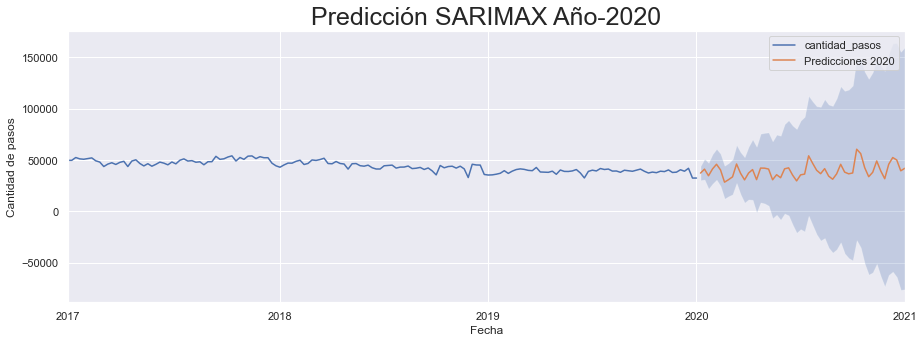

In [103]:
pred_2020 = results.get_forecast(steps=datetime.datetime(2020,12,31))
pred_2020_ci = pred_2020.conf_int()

ax = y.plot(label='Cantidad_pasos',figsize=(15,5))
pred_2020.predicted_mean.plot(ax=ax, label='Predicciones 2020')
ax.fill_between(pred_2020_ci.index,
                pred_2020_ci.iloc[:, 0],
                pred_2020_ci.iloc[:, 1], alpha=.25)
plt.title("Predicción SARIMAX Año-2020", fontsize=25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')

plt.legend()
plt.show()

Al analizar nuestros pronósticos de 2020 podemos ver que a medidad que pasa el tiempo los intervalos de confianza cada vez se hacen más grandes, lo cual tiene sentido considerando que mientras más pronosticamos hacia el futuro más nos alejamos de nuestros últimos valores observados, lo que a largo plazo afecta nuestra capacidad de predecir correctamente. Es importante considerar que este modelo no toma en cuenta situaciones imprevistas o irregulares como la pandemia. En el proyecto 4, nos gustaría explorar como se comparan estos resultados con nuestros valores observados en el 2020, pero muy posiblemente considerando la pandemia veremos que esté quizás no sea el modelo adecuado para el 2020.

## Conclusiones

1. Podemos concluir que el mejor modelo de predicción para el último trimestre del 2019 es el modelo SARIMA. Con este, obtuvimos el menor error considerando nuestra serie de media semanal. Aún así, el error de este modelo puede ser mejorado.
2. Como mencionamos anteriormente, también nos gustaría explorar nuestra predicción del 2020 versus los datos observados del 2020. Dado que nuestro modelo de predicción fue elaborado asumiendo que el futuro será similar al pasado sin considerar variables irregulares esperamos que sea un modelo inadecuado para el año 2020 debido a la pandemia que debió haber afectado considerablemente el pase de autos asimismo como el uso de efectivo para evitar la transmisión del virus. Por esta razón, en una próxima iteración nos gustaría tratar de incorporar este elemento de irregularidad si es posible y evaluar como quedan nuestros valores predichos contra los valores reales del 2020. Abajo, esbozamos nuestros datos reales para el 2020 y podemos concluir que efectivamene necesitamos mejorar nuestro modelo predicción para el año 2020 con lo cual agregar el elemento de irregularidad o explorar otros modelos va a ser ideal.

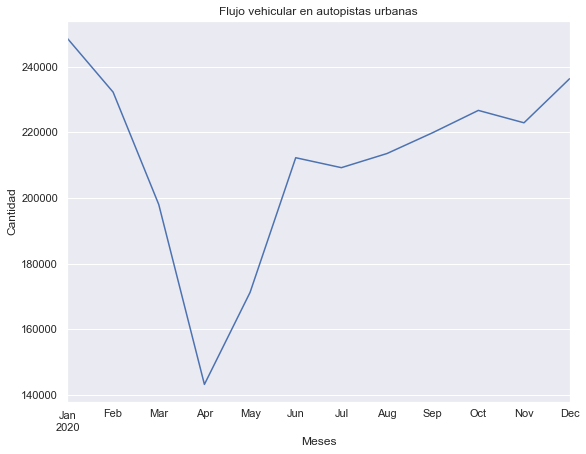

In [105]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',') #observamos nuestro datos reales para el año 2020

data_2020_copy = data_2020.copy()
data_2020_copy.fecha = pd.to_datetime(data_2020_copy["fecha"])
data_2020_copy["fecha"] = data_2020_copy["fecha"].dt.to_period(freq = "M")
month_df = data_2020_copy.groupby("fecha").size()

plt.figure(figsize = (9,7))
month_df.plot(x="DATE")
plt.title("Flujo vehicular en autopistas urbanas")
plt.xlabel("Meses")
plt.ylabel("Cantidad")
plt.show()

3. Para mejorar nuestra capacidad predictiva, especialmente para el año 2020, realizaremos la investigación apropiada para probar lo siguiente:

* Nos gustaría explorar la librería Prophet ya que siendo una librería ideada para el pronóstico de series de tiempo sobre el modelo Aditivo que además es resistente a valores atípicos, datos faltantes y cambios drásticos en una serie temporal. Por todo esto, parece ser ideal para aplicársela a nuestro dataset y encontrar un error menor del que obtuvimos en nuestro mejor modelo. Sobretodo, para mejorar nuestra predicción del 2020 donde sabemos que hubo el cambio drástico de la pandemia. Para ello usaremos como referencia la siguiente información:

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20Forecastings.ipynb


* Explorar el uso de redes neuronales para llevar nuestro error a un valor menor si es posible. Particularmente, nos gustaría utilizar LSTM que es un tipo de red neuronal recurrente que tiene la característica de recordar información pasada por lo cual al momento de predecir valores futuros tiene en cuenta información pasada, esto añadido al hecho de que pueden aprender dependencias largas y por tanto tienen una memoria de largo plazo, las hace ideales para trabajar con Series de Tiempo. Entonces, utilizando LSTM sobre el dataset estudiado con las variables tiempo y flujo vehicular que venimos usando a través de esta iteración, hacer un train/test split y aplicarlo como el resto de nuestros modelos con el objetivo de conseguir un error más cercano a cero del que conseguimos en nuestro mejor modelo. Tomando en cuenta la siguiente información:

https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237

https://www.tensorflow.org/tutorials/structured_data/time_series

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/LSTM%20Time%20Series%20Power%20Consumption.ipynb

Planteado lo anterior, esperamos que nuestro error de predicción para el último trimestre de 2019 pueda ser menor los 61 pasos promedios semanales que obtuvimos en el modelo SARIMA y para el 2020 esperamos tener resultados más acordes con la situación excepcional de la pandemia.